# EDA Students Performances
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Students Performance dataset and display the first few rows

In [2]:
dataset = pd.read_csv('StudentsPerformance.csv')
print(dataset.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


Info terkait kolom parental level of education:
*   Bachelor's degree: Orang tua siswa telah menyelesaikan pendidikan sarjana (S1).
*   Master's degree: Orang tua siswa telah menyelesaikan pendidikan pascasarjana (S2).
*   Associate's degree: Gelar akademik yang biasanya didapat setelah dua tahun kuliah, biasanya di perguruan tinggi komunitas.
*   Some college: Orang tua telah berkuliah di universitas tetapi tidak sampai lulus.
*   High school: Orang tua siswa hanya menyelesaikan pendidikan tingkat SMA.
*   Some high school: Orang tua siswa hanya bersekolah di SMA tetapi tidak menyelesaikannya.

Info terkait kolom lunch:
*   Standard: Siswa membayar untuk makanan siang dengan harga penuh, yang biasanya menunjukkan kondisi ekonomi keluarga yang baik.
*   Free/reduced: Siswa menerima makanan siang gratis atau dengan potongan harga, yang biasanya diberikan kepada keluarga dengan penghasilan lebih rendah atau siswa yang memenuhi syarat program subsidi.

## Show the percentage

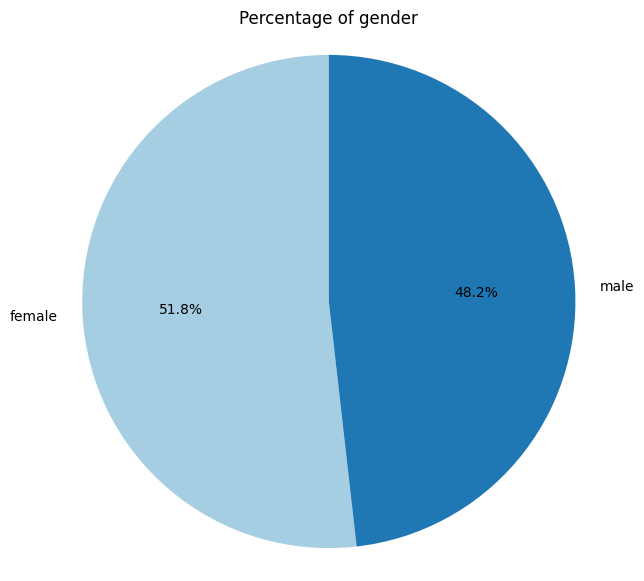

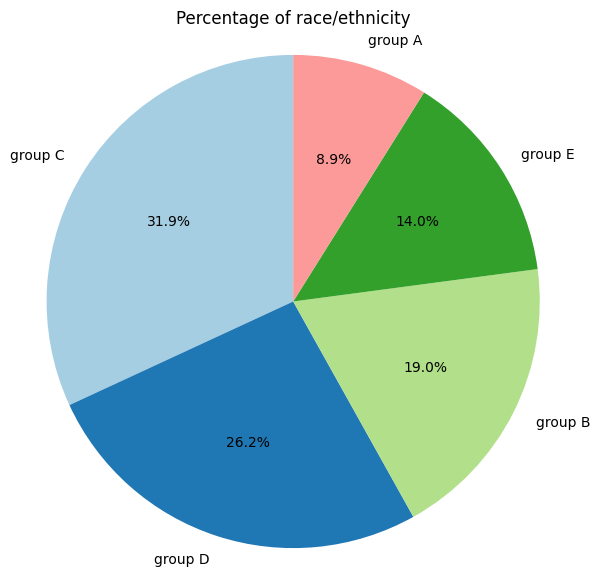

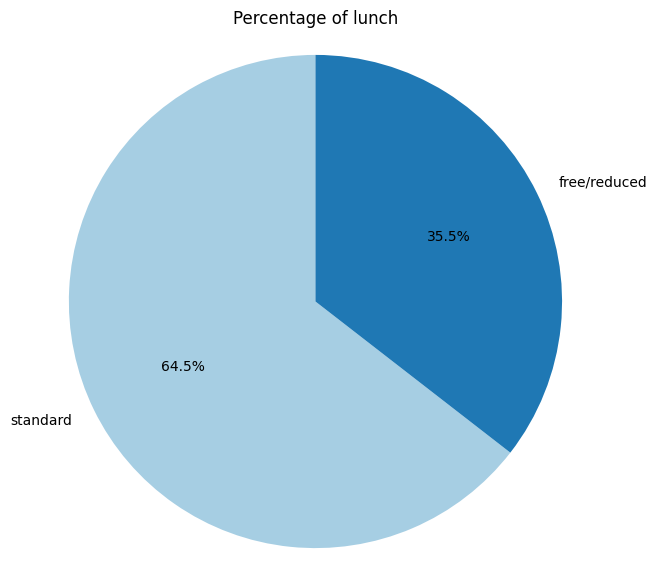

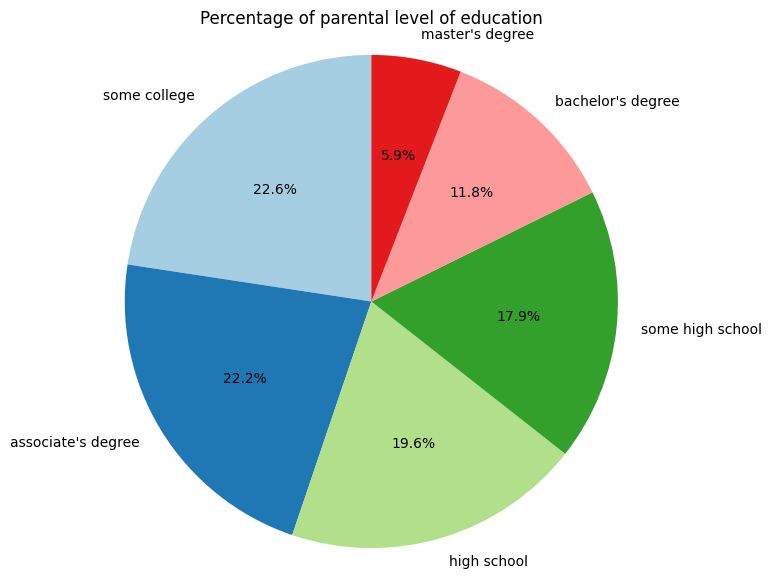

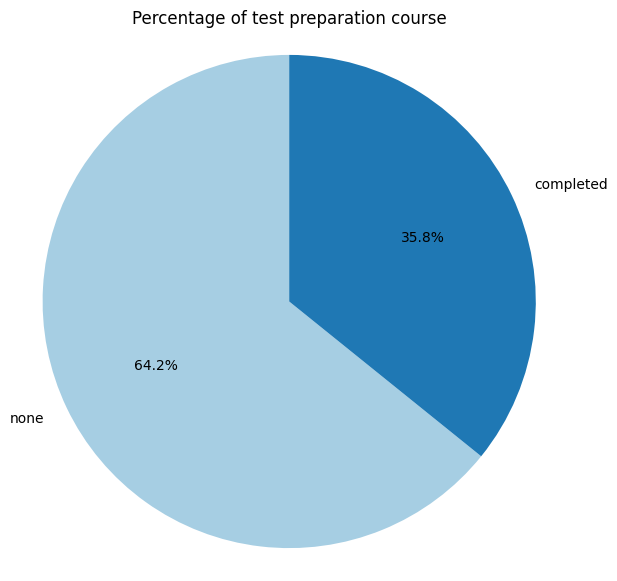

In [3]:
# Menampilkan persentase dari kolom kategorikal menggunakan pie chart
def plot_pie_chart(column_name):
    # Menghitung persentase setiap kategori
    data = dataset[column_name].value_counts()
    labels = data.index
    sizes = data.values

    # Membuat pie chart
    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
    plt.title(f'Percentage of {column_name}')
    plt.show()

# Contoh penggunaan untuk kolom 'gender'
plot_pie_chart('gender')

# Anda bisa mengganti 'gender' dengan nama kolom kategorikal lainnya, seperti:
plot_pie_chart('race/ethnicity')
plot_pie_chart('lunch')
plot_pie_chart('parental level of education')
plot_pie_chart('test preparation course')

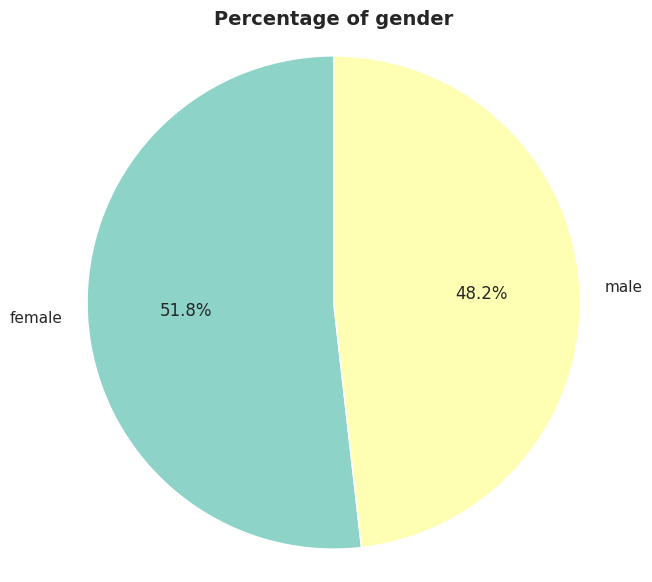

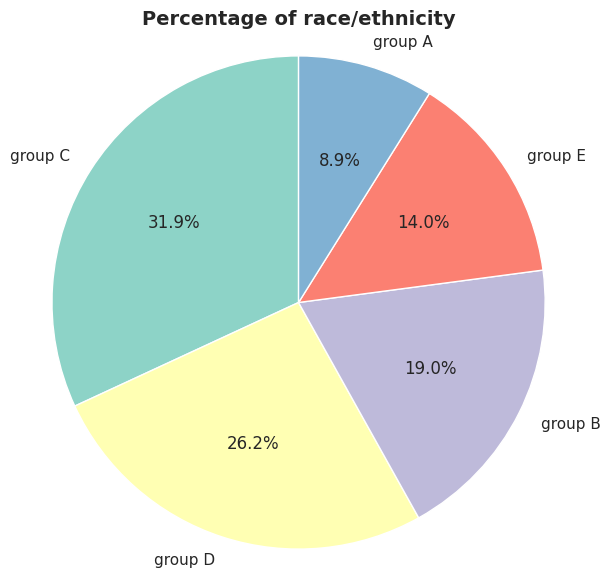

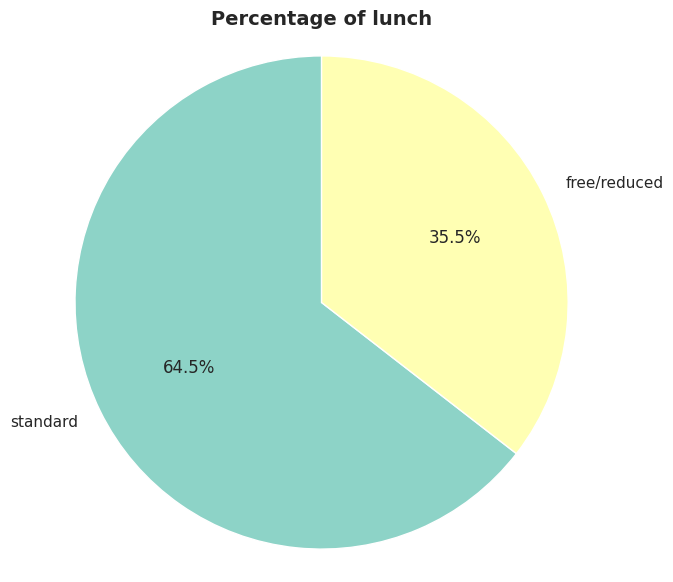

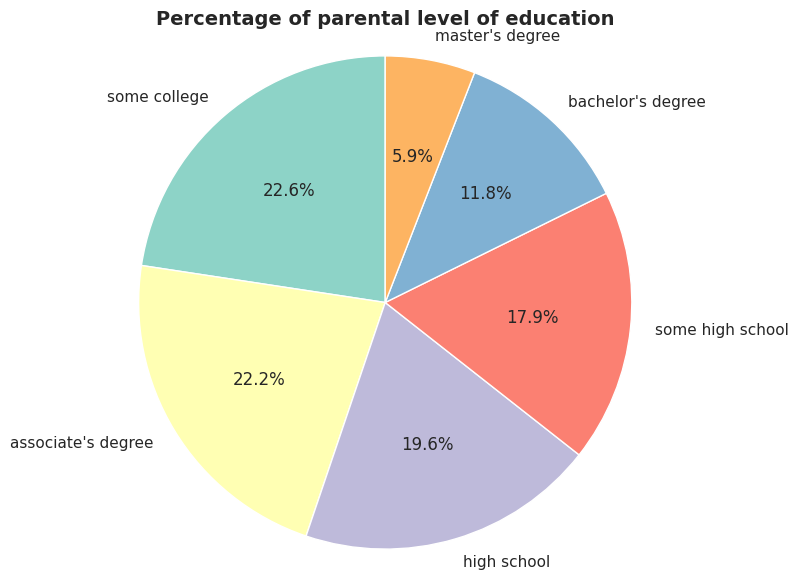

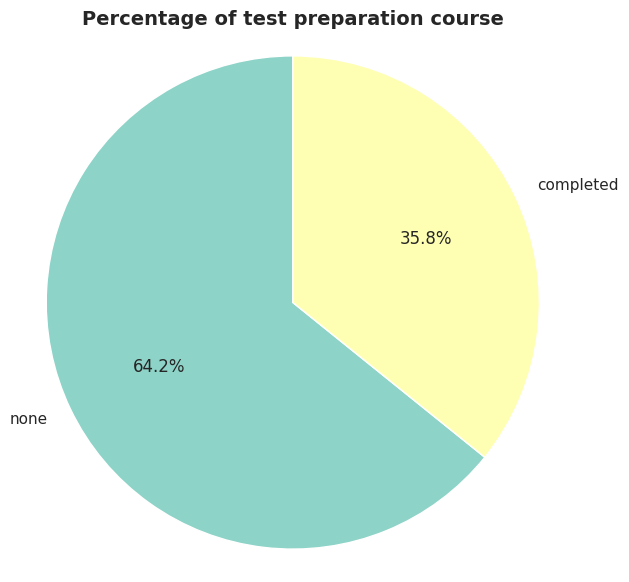

In [4]:
# Mengatur gaya grafik seaborn untuk estetika lebih baik
sns.set(style="whitegrid")

# Menampilkan persentase dari kolom kategorikal menggunakan pie chart
def plot_pie_chart(column_name):
    # Menghitung persentase setiap kategori
    data = dataset[column_name].value_counts()
    labels = data.index
    sizes = data.values

    # Membuat pie chart dengan palet warna yang lebih estetis
    plt.figure(figsize=(7,7))
    colors = sns.color_palette("Set3", len(labels))  # Menggunakan palet warna Set3
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

    plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
    plt.title(f'Percentage of {column_name}', fontsize=14, fontweight='bold')
    plt.show()

# Contoh penggunaan untuk kolom 'gender'
plot_pie_chart('gender')

# Anda bisa mengganti 'gender' dengan nama kolom kategorikal lainnya, seperti:
plot_pie_chart('race/ethnicity')
plot_pie_chart('lunch')
plot_pie_chart('parental level of education')
plot_pie_chart('test preparation course')

## Show the score distribution

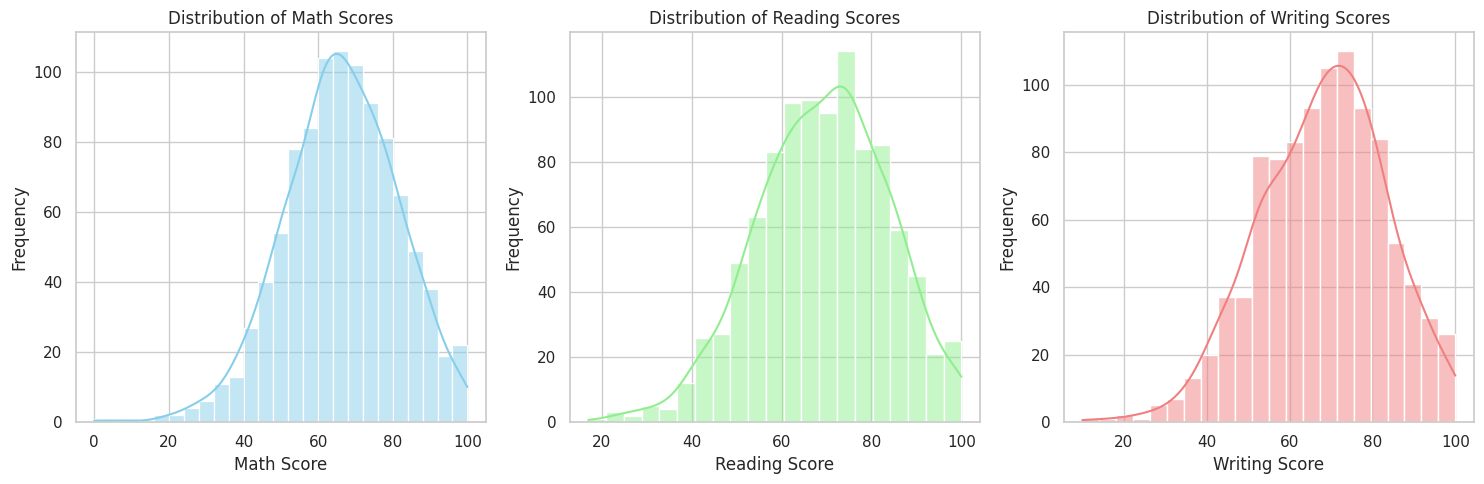

In [5]:
# Mengatur gaya untuk grafik
sns.set(style="whitegrid")

# Membuat subplot untuk menampilkan distribusi dari setiap skor
plt.figure(figsize=(15,5))

# 1. Distribusi nilai Math
plt.subplot(1, 3, 1)
sns.histplot(dataset['math score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# 2. Distribusi nilai Reading
plt.subplot(1, 3, 2)
sns.histplot(dataset['reading score'], kde=True, color='lightgreen')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

# 3. Distribusi nilai Writing
plt.subplot(1, 3, 3)
sns.histplot(dataset['writing score'], kde=True, color='lightcoral')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

# Menampilkan grafik
plt.tight_layout()
plt.show()

## Show the amount of fail and pass students if the minimum score is 75

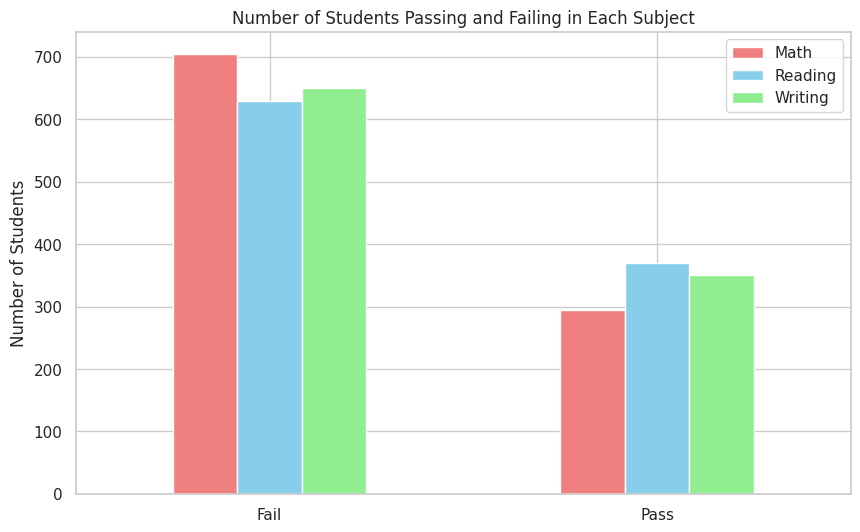

In [6]:
# Definisikan fungsi untuk menentukan lulus atau tidak
def pass_fail(score):
    return 'Pass' if score >= 75 else 'Fail'

# Tambahkan kolom baru untuk pass/fail berdasarkan math, reading, dan writing scores
dataset['math_result'] = dataset['math score'].apply(pass_fail)
dataset['reading_result'] = dataset['reading score'].apply(pass_fail)
dataset['writing_result'] = dataset['writing score'].apply(pass_fail)

# Menghitung jumlah siswa yang pass dan fail untuk masing-masing pelajaran
math_pass_fail = dataset['math_result'].value_counts()
reading_pass_fail = dataset['reading_result'].value_counts()
writing_pass_fail = dataset['writing_result'].value_counts()

# Tampilkan visualisasi hasil menggunakan bar chart:
results = pd.DataFrame({
    'Math': math_pass_fail,
    'Reading': reading_pass_fail,
    'Writing': writing_pass_fail
})

# Membuat bar chart untuk visualisasi hasil pass/fail
results.plot(kind='bar', figsize=(10,6), color=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Number of Students Passing and Failing in Each Subject')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

## Show the math, reading, and writing score based on gender, race/ethnicity, parental level of education, lunch, test preparation course

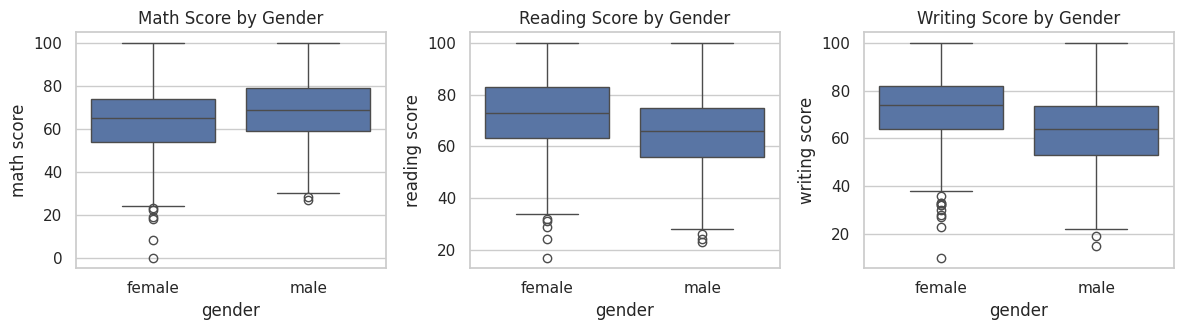

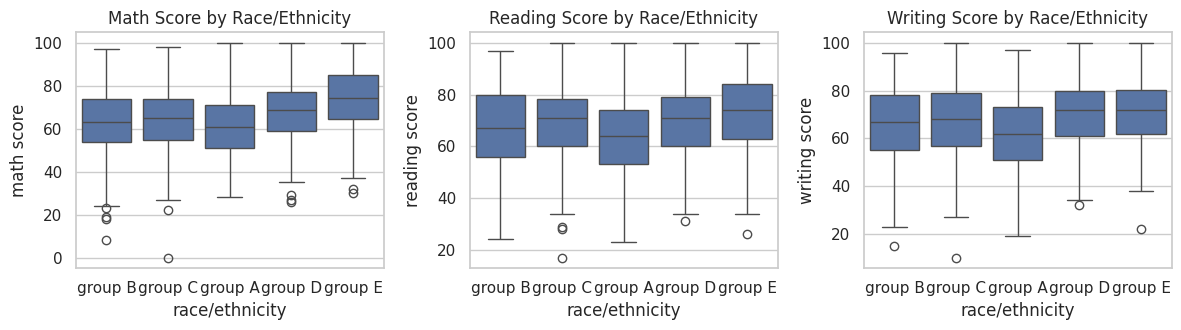

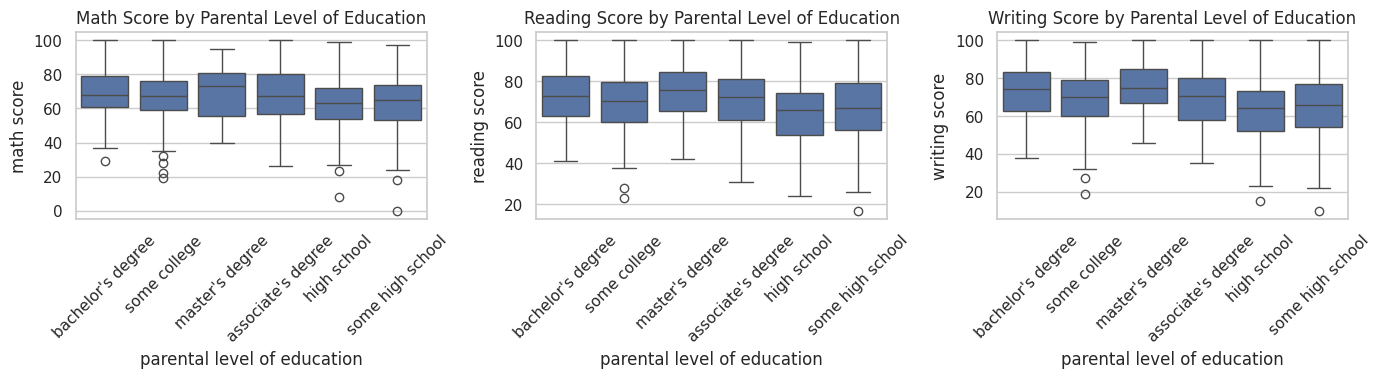

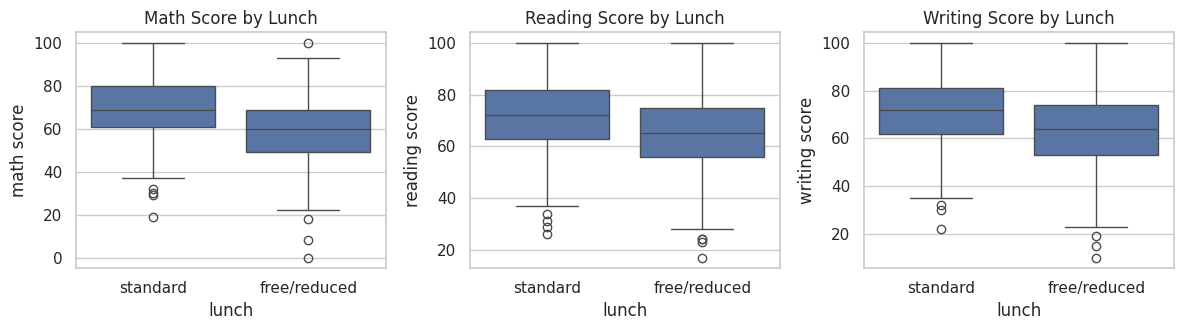

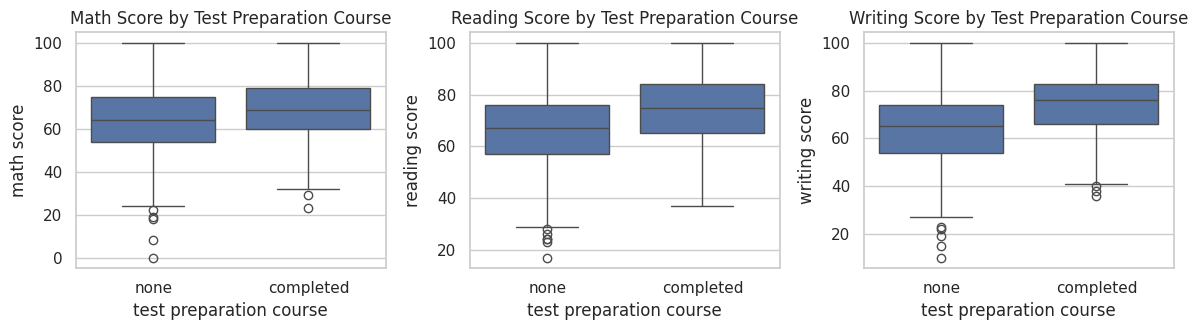

In [7]:
# Mengatur ukuran untuk semua grafik
plt.figure(figsize=(12,6))

# 1. Pengaruh gender terhadap nilai
plt.subplot(2, 3, 1)
sns.boxplot(x='gender', y='math score', data=dataset)
plt.title('Math Score by Gender')

plt.subplot(2, 3, 2)
sns.boxplot(x='gender', y='reading score', data=dataset)
plt.title('Reading Score by Gender')

plt.subplot(2, 3, 3)
sns.boxplot(x='gender', y='writing score', data=dataset)
plt.title('Writing Score by Gender')

plt.tight_layout()
plt.show()

# 2. Pengaruh race/ethnicity terhadap nilai
plt.figure(figsize=(12,6))

plt.subplot(2, 3, 1)
sns.boxplot(x='race/ethnicity', y='math score', data=dataset)
plt.title('Math Score by Race/Ethnicity')

plt.subplot(2, 3, 2)
sns.boxplot(x='race/ethnicity', y='reading score', data=dataset)
plt.title('Reading Score by Race/Ethnicity')

plt.subplot(2, 3, 3)
sns.boxplot(x='race/ethnicity', y='writing score', data=dataset)
plt.title('Writing Score by Race/Ethnicity')

plt.tight_layout()
plt.show()

# 3. Pengaruh parental level of education terhadap nilai
plt.figure(figsize=(14,6))

plt.subplot(2, 3, 1)
sns.boxplot(x='parental level of education', y='math score', data=dataset)
plt.title('Math Score by Parental Level of Education')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.boxplot(x='parental level of education', y='reading score', data=dataset)
plt.title('Reading Score by Parental Level of Education')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(x='parental level of education', y='writing score', data=dataset)
plt.title('Writing Score by Parental Level of Education')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Pengaruh lunch terhadap nilai
plt.figure(figsize=(12,6))

plt.subplot(2, 3, 1)
sns.boxplot(x='lunch', y='math score', data=dataset)
plt.title('Math Score by Lunch')

plt.subplot(2, 3, 2)
sns.boxplot(x='lunch', y='reading score', data=dataset)
plt.title('Reading Score by Lunch')

plt.subplot(2, 3, 3)
sns.boxplot(x='lunch', y='writing score', data=dataset)
plt.title('Writing Score by Lunch')

plt.tight_layout()
plt.show()

# 5. Pengaruh test preparation course terhadap nilai
plt.figure(figsize=(12,6))

plt.subplot(2, 3, 1)
sns.boxplot(x='test preparation course', y='math score', data=dataset)
plt.title('Math Score by Test Preparation Course')

plt.subplot(2, 3, 2)
sns.boxplot(x='test preparation course', y='reading score', data=dataset)
plt.title('Reading Score by Test Preparation Course')

plt.subplot(2, 3, 3)
sns.boxplot(x='test preparation course', y='writing score', data=dataset)
plt.title('Writing Score by Test Preparation Course')

plt.tight_layout()
plt.show()

## Show the average of all score based on each categories

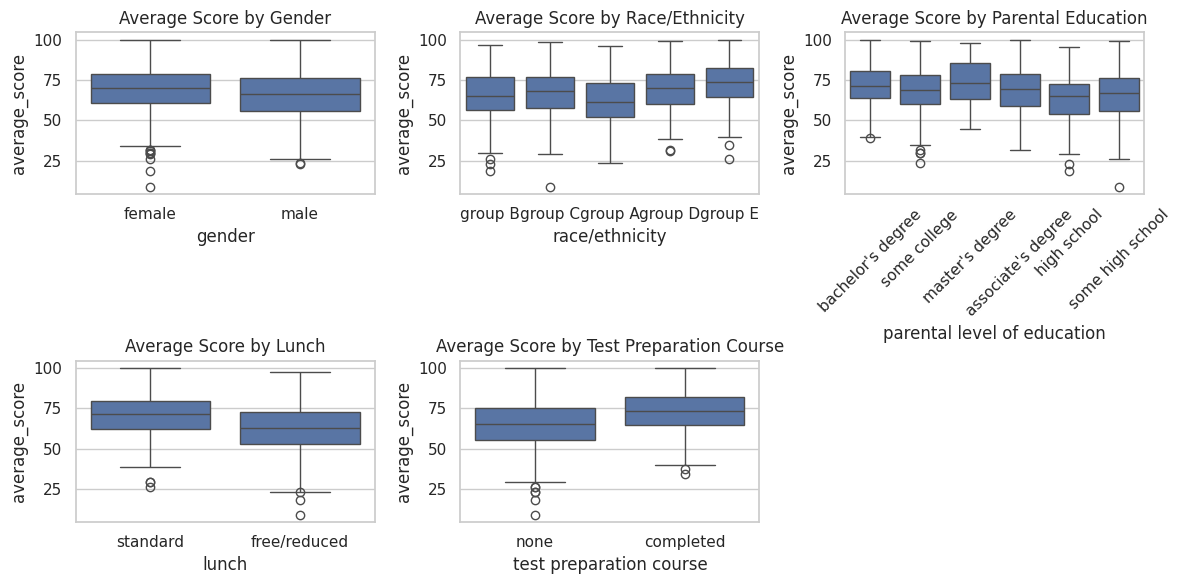

In [8]:
# Menambahkan kolom baru 'average_score' yang merupakan rata-rata dari nilai math, reading, dan writing
dataset['average_score'] = dataset[['math score', 'reading score', 'writing score']].mean(axis=1)

# Mengatur gaya untuk grafik
sns.set(style="whitegrid")

# 1. Korelasi rata-rata nilai dengan gender
plt.figure(figsize=(12,6))
plt.subplot(2, 3, 1)
sns.boxplot(x='gender', y='average_score', data=dataset)
plt.title('Average Score by Gender')

# 2. Korelasi rata-rata nilai dengan race/ethnicity
plt.subplot(2, 3, 2)
sns.boxplot(x='race/ethnicity', y='average_score', data=dataset)
plt.title('Average Score by Race/Ethnicity')

# 3. Korelasi rata-rata nilai dengan parental level of education
plt.subplot(2, 3, 3)
sns.boxplot(x='parental level of education', y='average_score', data=dataset)
plt.title('Average Score by Parental Education')
plt.xticks(rotation=45)

# 4. Korelasi rata-rata nilai dengan lunch
plt.subplot(2, 3, 4)
sns.boxplot(x='lunch', y='average_score', data=dataset)
plt.title('Average Score by Lunch')

# 5. Korelasi rata-rata nilai dengan test preparation course
plt.subplot(2, 3, 5)
sns.boxplot(x='test preparation course', y='average_score', data=dataset)
plt.title('Average Score by Test Preparation Course')

# Menampilkan grafik
plt.tight_layout()
plt.show()